# **Scratchpad**

# Chargement

In [1]:
from home_credit.load import get_table

# Visualiser la corrélation entre une variable et la probabilité de faire défaut

1. Quelque soit la table est la variable, il faut pouvoir y associer la TARGET. C'est la finalité de la fonction `home_credit.merge.targetize`.
2. Ceci étant fait, on peut décomposer les données en 3 sous-ensembles suivant la classe (1 (défaut), 0 (non défaut), -1 (à prédire))
3. Plusieurs analyses et visualisation possibles à assembler dans un même graphique (même esprit qu'avec mon linlog).
4. Facilité de mise en oeuvre : d'abord une variable particulière, puis des couples, triplets etc
5. Affiner en particulier sur les variables catégorielles, en commençant par les binaires
    * Sous cas particulier qui concerne toute variable : les NaN vs les autres

On démarre avec un cas pour mettre au point, puis 2, puis 3.

Les cas doivent être représentatifs, il faut donc un FLAG, un NUM, etc

Il faut un cas de chaque dans chaque table : on commence avec `previous_application`.

Une fois que c'est au point, passe de maj. des ea.

## Cas 1 : `previous_application..*FLAG_LAST_APP`

Ces deux drapeaux permettent d'éliminer des enregistrements erronés.

Ils sont capitaux pour le nettoyage des données.

### 0\. Récupération des données

In [2]:
from home_credit.load import get_table
from home_credit.utils import get_datablock

prev_app = get_table("previous_application").copy()
data_block = get_datablock(prev_app, ".*FLAG_LAST_APP")
display(data_block)

RAW_PREVIOUS_APPLICATION,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY
0,Y,1
1,Y,1
2,Y,1
3,Y,1
4,Y,1
...,...,...
1670209,Y,1
1670210,Y,1
1670211,Y,1
1670212,Y,1


### 1\. Adjonction de `TARGET`

In [4]:
from home_credit.merge import targetize
if "TARGET" not in prev_app.columns:
    target = targetize(prev_app.SK_ID_CURR)
    prev_app.insert(0, "TARGET", target)
display(prev_app)

RAW_PREVIOUS_APPLICATION,TARGET,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,2030495,271877,Consumer loans,1730.430,17145.000,17145.000,0.000,17145.000,SATURDAY,...,Connectivity,12.000,middle,POS mobile with interest,365243.000,-42.000,300.000,-42.000,-37.000,0.000
1,0,2802425,108129,Cash loans,25188.615,607500.000,679671.000,NaN,607500.000,THURSDAY,...,XNA,36.000,low_action,Cash X-Sell: low,365243.000,-134.000,916.000,365243.000,365243.000,1.000
2,0,2523466,122040,Cash loans,15060.735,112500.000,136444.500,NaN,112500.000,TUESDAY,...,XNA,12.000,high,Cash X-Sell: high,365243.000,-271.000,59.000,365243.000,365243.000,1.000
3,0,2819243,176158,Cash loans,47041.335,450000.000,470790.000,NaN,450000.000,MONDAY,...,XNA,12.000,middle,Cash X-Sell: middle,365243.000,-482.000,-152.000,-182.000,-177.000,1.000
4,0,1784265,202054,Cash loans,31924.395,337500.000,404055.000,NaN,337500.000,THURSDAY,...,XNA,24.000,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,-1,2300464,352015,Consumer loans,14704.290,267295.500,311400.000,0.000,267295.500,WEDNESDAY,...,Furniture,30.000,low_normal,POS industry with interest,365243.000,-508.000,362.000,-358.000,-351.000,0.000
1670210,-1,2357031,334635,Consumer loans,6622.020,87750.000,64291.500,29250.000,87750.000,TUESDAY,...,Furniture,12.000,middle,POS industry with interest,365243.000,-1604.000,-1274.000,-1304.000,-1297.000,0.000
1670211,0,2659632,249544,Consumer loans,11520.855,105237.000,102523.500,10525.500,105237.000,MONDAY,...,Consumer electronics,10.000,low_normal,POS household with interest,365243.000,-1457.000,-1187.000,-1187.000,-1181.000,0.000
1670212,0,2785582,400317,Cash loans,18821.520,180000.000,191880.000,NaN,180000.000,WEDNESDAY,...,XNA,12.000,low_normal,Cash X-Sell: low,365243.000,-1155.000,-825.000,-825.000,-817.000,1.000


## 2\. Quotient par `TARGET`

Ceci étant fait, on peut décomposer les données en 3 sous-ensembles suivant la classe (1 (défaut), 0 (non défaut), -1 (à prédire)).

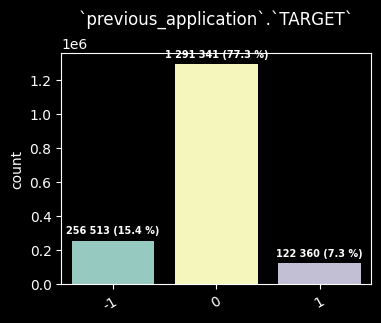

In [5]:
from pepper.univar import agg_value_counts
from home_credit.plots import show_cat_mod_counts
import matplotlib.pyplot as plt
agg_value_counts(prev_app.TARGET)
show_cat_mod_counts(
    prev_app.TARGET,
    title="`previous_application`.`TARGET`",
    ax=plt.subplots(figsize=(4, 3))[1]
)

In [6]:
data_block = get_datablock(prev_app, ".*FLAG_LAST_APP|TARGET").copy()
display(data_block)

RAW_PREVIOUS_APPLICATION,TARGET,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY
0,0,Y,1
1,0,Y,1
2,0,Y,1
3,0,Y,1
4,0,Y,1
...,...,...,...
1670209,-1,Y,1
1670210,-1,Y,1
1670211,0,Y,1
1670212,0,Y,1


In [7]:
display(data_block.value_counts(dropna=False))

TARGET  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY
 0      Y                            1                         1284197
-1      Y                            1                          255248
 1      Y                            1                          121508
 0      N                            0                            3918
                                     1                            2605
-1      N                            0                             752
 0      Y                            0                             621
 1      N                            0                             444
-1      N                            1                             409
 1      N                            1                             347
-1      Y                            0                             104
 1      Y                            0                              61
Name: count, dtype: int64

On encode la variables catégorielles binaires avec 0, 1, -1 (NaN) : dans ce 1er exemple, variables sans NA.

In [8]:
data_block.FLAG_LAST_APPL_PER_CONTRACT = \
    data_block.FLAG_LAST_APPL_PER_CONTRACT.astype("category").cat.codes

data_block.NFLAG_LAST_APPL_IN_DAY = \
    data_block.NFLAG_LAST_APPL_IN_DAY.astype("category").cat.codes

display(data_block.T)

,0,1,2,3,4,5,6,7,8,9,...,1670204,1670205,1670206,1670207,1670208,1670209,1670210,1670211,1670212,1670213
RAW_PREVIOUS_APPLICATION,,,,,,,,,,,,,,,,,,,,,
TARGET,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,-1,-1,0,0,0
FLAG_LAST_APPL_PER_CONTRACT,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
NFLAG_LAST_APPL_IN_DAY,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


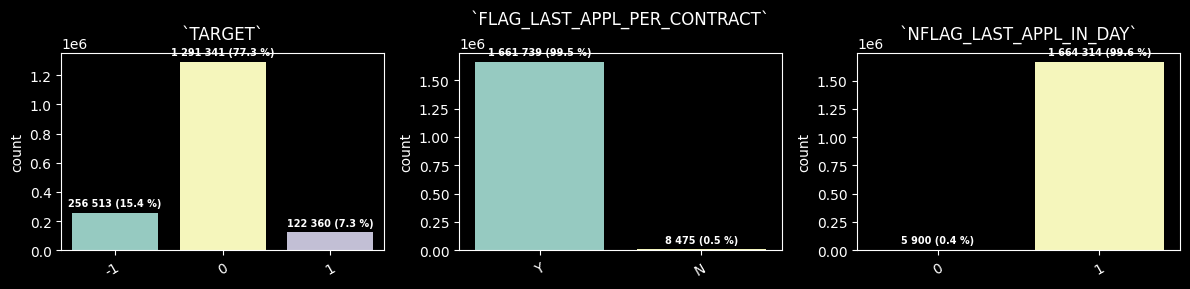

In [9]:
from pepper.univar import agg_value_counts
from home_credit.plots import show_cat_mod_counts
import matplotlib.pyplot as plt
import numpy as np
# agg_value_counts(prev_app.TARGET)
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axes = np.ravel(axes)
[
    show_cat_mod_counts(
        prev_app[var_name],
        title=f"`{var_name}`",
        ax=ax
    )
    for var_name, ax in zip(list(data_block.columns), axes)
]
#plt.suptitle("`previous_application`")
plt.tight_layout()
plt.show()

### Alignement des labels de classes

In [10]:
from pepper.cl_utils import match_class

def align_on_target(data_block, var_name):
    y = data_block.TARGET
    y_pred = data_block[var_name]
    mapping = match_class(y_pred, y)  # linear assignement
    data_block[var_name] = np.array([mapping[clu] for clu in y_pred])


align_on_target(data_block, "FLAG_LAST_APPL_PER_CONTRACT")
align_on_target(data_block, "NFLAG_LAST_APPL_IN_DAY")
display(data_block.T)

,0,1,2,3,4,5,6,7,8,9,...,1670204,1670205,1670206,1670207,1670208,1670209,1670210,1670211,1670212,1670213
RAW_PREVIOUS_APPLICATION,,,,,,,,,,,,,,,,,,,,,
TARGET,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,-1,-1,0,0,0
FLAG_LAST_APPL_PER_CONTRACT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NFLAG_LAST_APPL_IN_DAY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.1. Matrice de confusion

Une première approche à envisager, dans le cas de classes, et en particulier binaires, c'est une matrice de confusion :

*Récupérer ce que j'ai fait sur le projet précédent : c'était invoqué dans la version la plus verbose de mon pipeline*

```Python
cla_labels = labels.cla_labels
clu_labels = labels.clu_labels
show_confusion_matrix(cla_labels, clu_labels)
display_classification_report(cla_labels, clu_labels)
if verbosity > 2:
    show_multilabel_confusion_matrixes(cla_labels, clu_labels)
```

Ces fonctions sont définies dans `scoring.py`


Confusion matrix


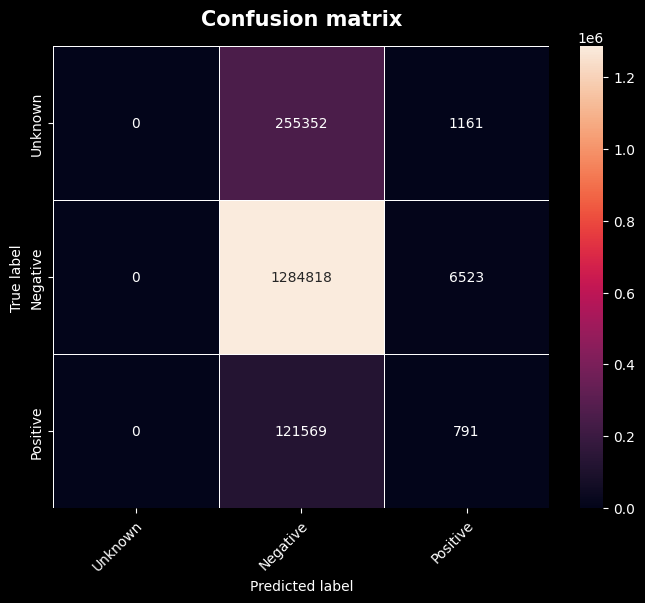

In [11]:
from pepper.scoring import show_confusion_matrix
from home_credit.utils import get_class_label_name_map

# TODO : cf. mes autres matrices d'adj, par ex sur les relation inter-tables, version avec %

show_confusion_matrix(
    data_block.TARGET,
    data_block.FLAG_LAST_APPL_PER_CONTRACT,
    list(get_class_label_name_map().values())
)


Confusion matrix


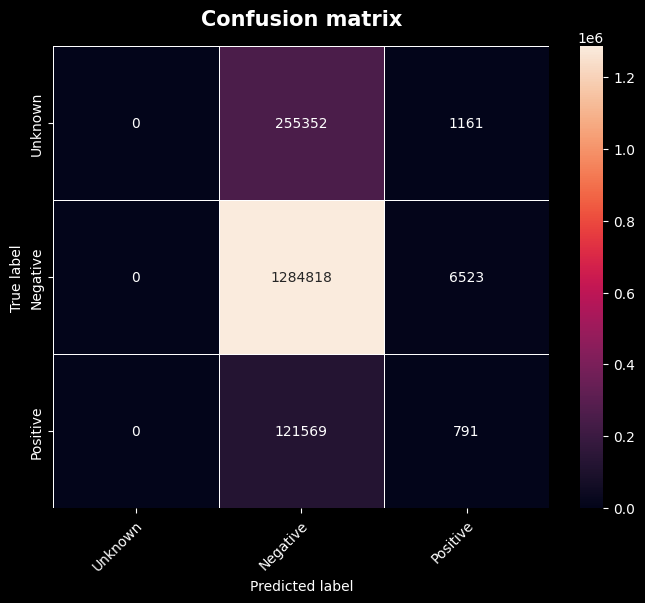

In [12]:
from pepper.scoring import show_confusion_matrix
from home_credit.utils import get_class_label_name_map

# TODO : cf. mes autres matrices d'adj, par ex sur les relation inter-tables, version avec %

show_confusion_matrix(
    data_block.TARGET,
    data_block.FLAG_LAST_APPL_PER_CONTRACT,
    list(get_class_label_name_map().values())
)

Il faut bien distinguer le rééquilibrage d'échantillonnage pour renforcer la capacité du modèle a reconnaître les positifs sous-représentés, du rééquilibrage de la mesure qui rend compte des performances prédictives.

En outre, il faudrait procéder au :
1. meilleur alignement (algorithme Hongrois),
2. mesurer l'ARI, Jaccard $\displaystyle\frac{|\cap|}{|\cup|}$, etc mais en contexte de déséquilibre.

```Python
mapping = match_class(y_pred, y)  # linear assignement
y_pred = np.array([mapping[clu] for clu in y_pred])
```

J'avais placé la fonction `match_class` dans `tx_ml.py`, mais ce n'est pas une place logique. Dans le cadre de P7, je la mets dans un nouveau module `cl_utils.py`.


multilabel confusion matrixes


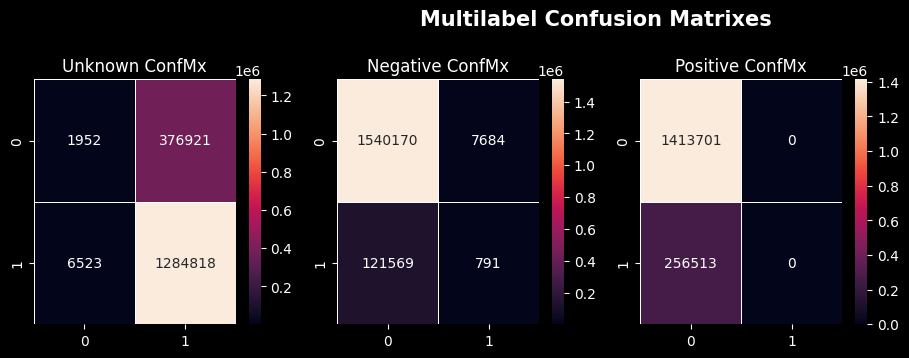

In [13]:
from pepper.scoring import show_multilabel_confusion_matrixes
from home_credit.utils import get_class_label_name_map

# TODO : cf. mes autres matrices d'adj, par ex sur les relation inter-tables, version avec %

show_multilabel_confusion_matrixes(
    data_block.TARGET,
    data_block.FLAG_LAST_APPL_PER_CONTRACT,
    list(get_class_label_name_map().values())
)


multilabel confusion matrixes


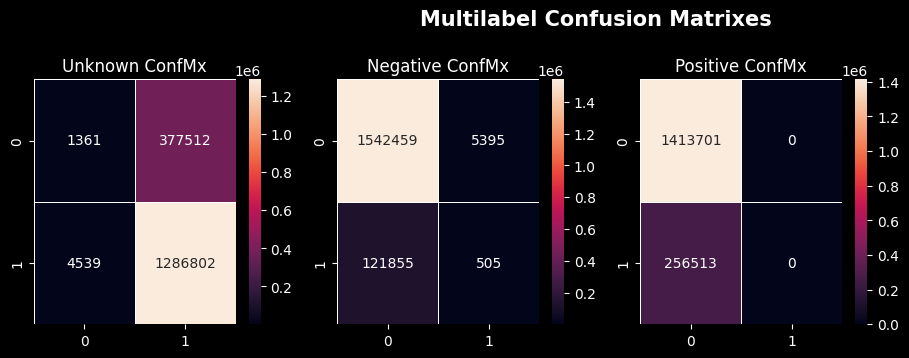

In [14]:
from pepper.scoring import show_multilabel_confusion_matrixes
from home_credit.utils import get_class_label_name_map

# TODO : cf. mes autres matrices d'adj, par ex sur les relation inter-tables, version avec %

show_multilabel_confusion_matrixes(
    data_block.TARGET,
    data_block.NFLAG_LAST_APPL_IN_DAY,
    list(get_class_label_name_map().values())
)

## Rééquilibrage de la mesure

Voir `trashme.ipynb` dans le projet précédent :

`precision_score` : $\displaystyle P = \frac{tp}{tp + fp}$

`recall_score` : $\displaystyle R = \frac{tp}{tp + fn}$

`f1_score` (F1 score, also known as balanced F-score or F-measure) : $\displaystyle F_1 = 2 \frac{P \times R}{P + R}$

`fbeta_score` : $\displaystyle F_\beta = (1 +\beta^2) \frac{P \times R}{\beta^2P + R}$

`jaccard_score` : $\displaystyle J = \frac{tp}{tp + fp + fn} = \frac{|A \cap B|}{|A \cup B|}$

`precision_recall_fscore_support`:  all in one 

Calcul, globalement, et par classe.

Par classe, `micro = macro`.

Constatons que nos scores sont *excellents*, $77\,\%$ en précision !

Evidemment, si nous avons un pour mille de positifs et que nous prédisons seulement des négatifs, dans $99.9\,\%$ des cas, nous voyons juste !

Un indice du fait que cela ne se présente pas si bien est le décalage important entre les scores macros et micros.

Notre but, dans cette section, est de passer des scores classiques à des scores pondérés.

Ci-dessous une étude plus formelle de la problématique, en vue de concevoir des scores plus adaptés à notre problématique de classes déséquilibrées, avec des positifs sous-représentés.

In [16]:
from pepper.scoring import global_similarity_report, local_similarity_report

cla_labels = data_block.TARGET
clu_labels = data_block.FLAG_LAST_APPL_PER_CONTRACT

global_similarity_report(cla_labels, clu_labels)
local_similarity_report(cla_labels, clu_labels, indent=9)


Global similarity report
                   accuracy: 1285609
        normalized accuracy: 0.77
            precision micro: 0.77


c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


            precision macro: 0.29
               recall micro: 0.77
               recall macro: 0.33
                   f1 micro: 0.77
                   f1 macro: 0.29
   fbeta_5 (↑ recall) micro: 0.77
   fbeta_5 (↑ recall) macro: 0.33
   fbeta_1_5 (↑ prec) micro: 0.77
   fbeta_1_5 (↑ prec) macro: 0.28
              jaccard micro: 0.63
              jaccard macro: 0.26

Local similarity report
                   class_id: C_00, C_01, C_02


c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision: 0.77, 0.09, 0.00
                     recall: 0.99, 0.01, 0.00
                         f1: 0.87, 0.01, 0.00
         fbeta_5 (↑ recall): 0.98, 0.01, 0.00
         fbeta_1_5 (↑ prec): 0.78, 0.06, 0.00
                    jaccard: 0.77, 0.01, 0.00


In [17]:
from pepper.scoring import global_similarity_report, local_similarity_report

cla_labels = data_block.TARGET
clu_labels = data_block.NFLAG_LAST_APPL_IN_DAY

global_similarity_report(cla_labels, clu_labels)
local_similarity_report(cla_labels, clu_labels, indent=9)


Global similarity report
                   accuracy: 1287307
        normalized accuracy: 0.77
            precision micro: 0.77


c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


            precision macro: 0.29
               recall micro: 0.77
               recall macro: 0.33
                   f1 micro: 0.77
                   f1 macro: 0.29
   fbeta_5 (↑ recall) micro: 0.77
   fbeta_5 (↑ recall) macro: 0.33
   fbeta_1_5 (↑ prec) micro: 0.77
   fbeta_1_5 (↑ prec) macro: 0.28
              jaccard micro: 0.63
              jaccard macro: 0.26

Local similarity report
                   class_id: C_00, C_01, C_02


c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision: 0.77, 0.09, 0.00
                     recall: 1.00, 0.00, 0.00
                         f1: 0.87, 0.01, 0.00
         fbeta_5 (↑ recall): 0.99, 0.00, 0.00
         fbeta_1_5 (↑ prec): 0.78, 0.05, 0.00
                    jaccard: 0.77, 0.00, 0.00


Considérons deux classes d'individus étiquetés respectivement par 0 (Négatif) et 1 (Positifs).

Notons $N$ l'ensemble des individus négatifs et $P$ l'ensemble des positifs.

Notons $p = |P|$ et $n = |N|$ les effectifs (cardinaux) de ces deux classes.

Considérons que que $p \ll n$ et posons $\displaystyle\varepsilon = \frac{p}{n}$.

Alors $\varepsilon \ll 1$ et $p = \varepsilon n$ et l'effectif de l'échantillon est $p + n = (1 + \varepsilon)n$.

Supposons que l'on prédise uniquement des négatifs, alors :

* $(tp, fp, tn, fn) = (0, 0, 1, \varepsilon)n$
* `precision_score` : $\displaystyle P = \frac{tp}{tp + fp} = 0$
* `recall_score` : $\displaystyle R = \frac{tp}{tp + fn} = 0$
* `f1_score` : $\displaystyle F_1 = 2 \frac{P \times R}{P + R} = 0$
* `fbeta_score` : $\displaystyle F_\beta = (1 +\beta^2) \frac{P \times R}{\beta^2P + R} = 0$
* `jaccard_score` : $\displaystyle J = \frac{tp}{tp + fp + fn} = \frac{|A \cap B|}{|A \cup B|} = 0$

Supposons que l'on prédise uniquement des positifs, alors :

* $(tp, fp, tn, fn) = (\varepsilon, 1-\varepsilon, 0, 0)n$
* `precision_score` : $\displaystyle P = \frac{tp}{tp + fp} = \varepsilon$
* `recall_score` : $\displaystyle R = \frac{tp}{tp + fn} = 1$
* `f1_score` : $\displaystyle F_1 = 2 \frac{P \times R}{P + R} = 2 \frac{\varepsilon}{\varepsilon + 1} \approx 2\varepsilon$
* `fbeta_score` : $\displaystyle F_\beta = (1 +\beta^2) \frac{P \times R}{\beta^2P + R} = \frac{\varepsilon +\beta^2\varepsilon}{1 + \beta^2\varepsilon} \in [\varepsilon, 1]$
* `jaccard_score` : $\displaystyle J = \frac{tp}{tp + fp + fn} = \frac{|A \cap B|}{|A \cup B|} = \varepsilon$

Supposons enfin que nous prédisions aléatoirement un positif avec la probabilité $\displaystyle\frac{p}{p+n} = \displaystyle\frac{\varepsilon}{1 + \varepsilon} \approx \varepsilon$ et un négatif avec la probabilité $\displaystyle\frac{n}{p+n} = \displaystyle\frac{1}{1 + \varepsilon} \approx 1$, alors :
* $(tp, fp, tn, fn) = (\frac{\varepsilon^2}{1+\varepsilon}, \frac{\varepsilon}{1+\varepsilon}, \frac{1}{1+\varepsilon}, \frac{\varepsilon}{1+\varepsilon})n$
* `precision_score` : $\displaystyle P = \frac{tp}{tp + fp} = \frac{\varepsilon}{1+\varepsilon} \approx \varepsilon$
* `recall_score` : $\displaystyle R = \frac{tp}{tp + fn} = \frac{\varepsilon}{1+\varepsilon} \approx \varepsilon$
* `f1_score` : $\displaystyle F_1 = 2 \frac{P \times R}{P + R} = \frac{\varepsilon}{1+\varepsilon} \approx \varepsilon$
* `fbeta_score` : $\displaystyle F_\beta = (1 +\beta^2) \frac{P \times R}{\beta^2P + R} = \frac{\varepsilon}{1+\varepsilon} \approx \varepsilon$
* `jaccard_score` : $\displaystyle J = \frac{tp}{tp + fp + fn} = \frac{|A \cap B|}{|A \cup B|} = \frac{\varepsilon}{2+\varepsilon} \approx \frac{1}{2}\varepsilon$


Dans ces différents cas de figure de type *dummy*, seul le bêta score avec un $\beta$ suffisamment grand, nous permet d'obtenir autre chose qu'une mesure extrême et peu signifiante.

Effectivement, la seule manière de compenser le déséquilibre des classes est d'utiliser des scores pondérés, avec des poids qui rééquilibrent en favorisant la classe dominée et en défavorisant la classe dominante.

Les deux poids suivants vont remplir cet objectif, pour l'ensemble des mesures que nous envisageons d'utiliser :
* $\displaystyle w_p = \frac{1}{1 + p}$
* $\displaystyle w_n = \frac{1}{1 + n}$

Le $1$ au dénominateur prévient la possibilité de division par $0$ pour les éventuelles classes vides.

La pondération va jouer dès les quantités essentielles $tp, fp, tn, fn$, qui sont les termes de base pour l'ensemble l'ensemble des scores.

La définition des termes pondérés suivante serait naïve : $tp' = w_p tp$, $fp' = w_p fp$, $tn' = w_n tn$, $fn' = w_n fn$.

En effet, par exemple, le score de précision demeurerait inchangé : $\displaystyle P = \frac{tp'}{tp' + fp'} = P$.

Nous allons plutôt nous appuyer sur le raisonnement de dénombrement qui nous a conduit aux valeurs du scénario de prédiction aléatoire.

Nous souhaitons que les scores, dans les 3 cas vus plus haut, soient ceux que l'on obtiendrait si les deux classes étaient parfaitement équilibrées.

**A REPRENDRE + TARD** et terminer




## Visualisation de KDE d'une variable suivant les classes cibles

In [3]:
from home_credit.load import get_table
from home_credit.merge import targetize

data = get_table("application").copy()
if "TARGET" not in data.columns:
    target = targetize(data.SK_ID_CURR)
    data.insert(0, "TARGET", target)

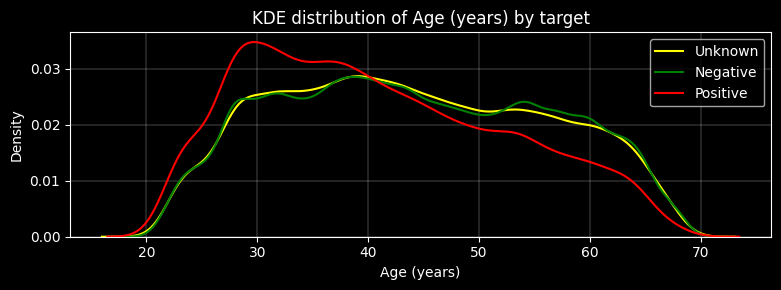

In [4]:
from home_credit.plots import by_target_class_kdeplot

by_target_class_kdeplot(
    data, "DAYS_BIRTH",
    transf_var=lambda s: -s / 365.25,
    var_rename="Age (years)"
)

# **Dédramatisons**

Trouver un peu d'info, un peu de TP
* Echantillonage équilibré et entraînement du modèle
* Github Action
* SMOTE, feature importance
* Tableau de bord Flask
* Déploiment et tracking MLFlow
* Déploiement dans le cloud Azur

Mais pour commencer du 2 lignes de code :
* ✔ Le diagramme précédent en version multi sur un groupe de valeurs numériques :
    * quand tout sera abouti et intégré, les fonctions correctrices d'erreurs et d'imputation setront appelées au préalable.
* Taux de défaut par classe, et par classe après cut : fonction générique

## Dédramatiser : datablock KDE

Le diagramme précédent en version multi sur un groupe de valeurs numériques : quand tout sera abouti et intégré, les fonctions correctrices d'erreurs et d'imputation setront appelées au préalable.

In [21]:
from home_credit.nb_macros import get_labeled_datablock
from home_credit.feat_eng import nullify_365243
datablock = get_labeled_datablock("application", "DAYS_.*")
nullify_365243(datablock)
datablock[datablock.columns[1:]] = -datablock[datablock.columns[1:]] / 365.25
display(datablock)

application,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,1,25.903,1.744,9.988,5.804,3.105
1,0,45.900,3.253,3.247,0.797,2.267
2,0,52.145,0.616,11.663,6.930,2.231
3,0,52.033,8.320,26.921,6.672,1.689
4,0,54.571,8.318,11.803,9.467,3.028
...,...,...,...,...,...,...
356250,-1,54.675,14.152,24.898,9.306,1.873
356251,-1,30.626,3.146,8.255,8.222,-0.000
356252,-1,43.592,8.315,7.340,4.118,2.294
356253,-1,38.242,7.477,4.000,3.734,6.319


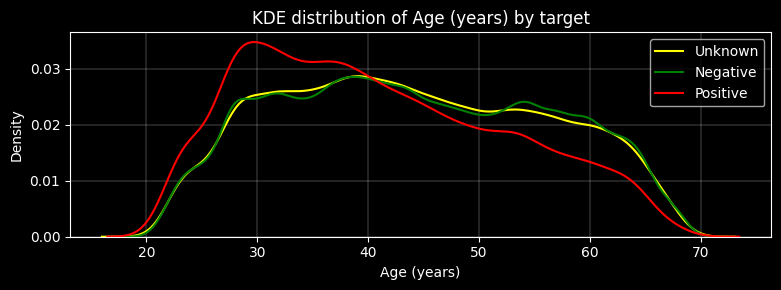

In [22]:
from home_credit.plots import by_target_class_kdeplot
by_target_class_kdeplot(datablock, "DAYS_BIRTH", var_rename="Age (years)")

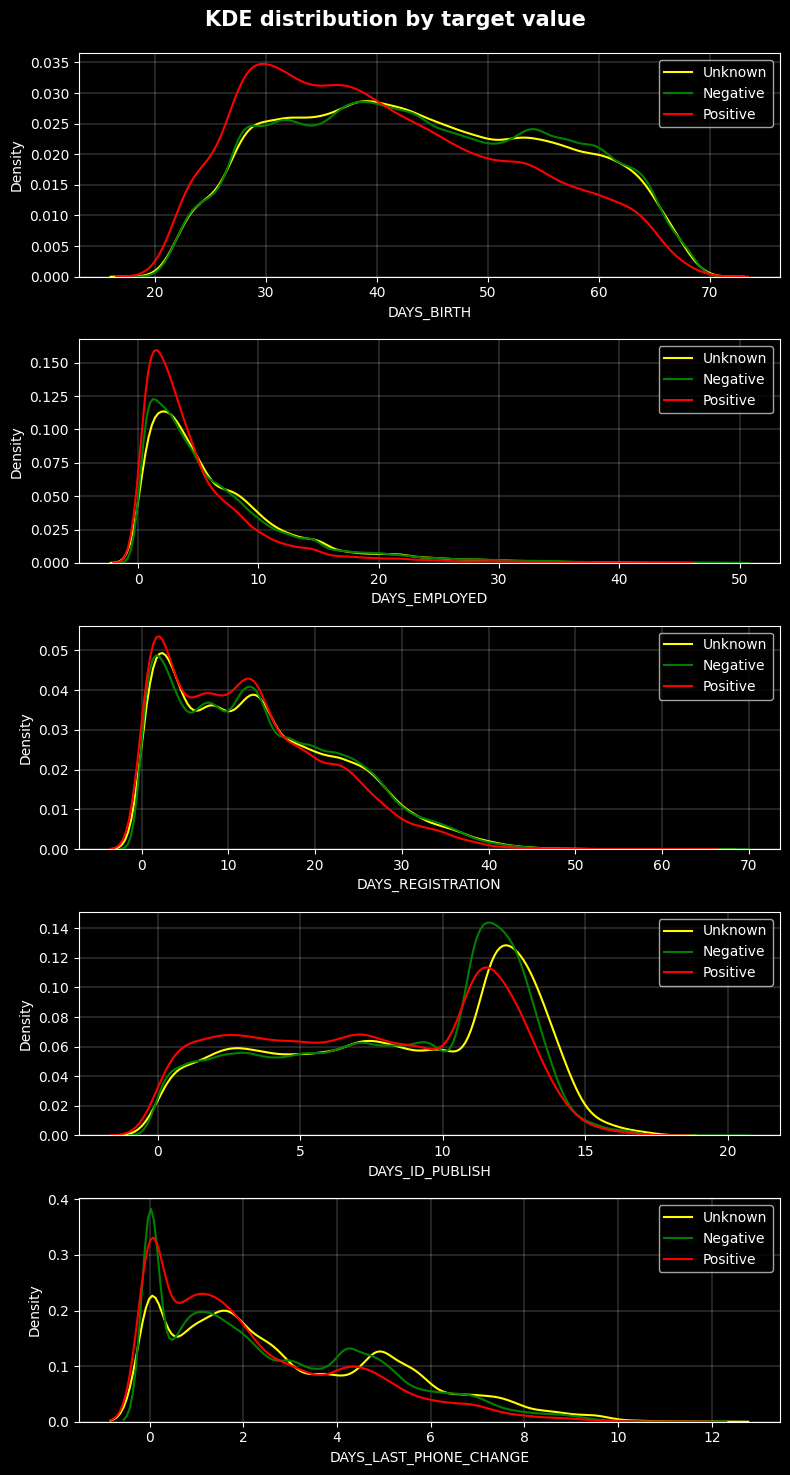

In [23]:
from home_credit.plots import datablock_by_target_class_kdeplot
datablock_by_target_class_kdeplot(datablock)

## Dédramatiser : taux de DFD par classe et discrétisation des var continues

### Cas d'une variable de classe

In [24]:
from home_credit.nb_macros import get_labeled_datablock
datablock = get_labeled_datablock("application", "NAME_.*")
display(datablock)

application,TARGET,NAME_CONTRACT_TYPE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,1,Cash loans,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
1,0,Cash loans,Family,State servant,Higher education,Married,House / apartment
2,0,Revolving loans,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
3,0,Cash loans,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment
4,0,Cash loans,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
...,...,...,...,...,...,...,...
356250,-1,Cash loans,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment
356251,-1,Cash loans,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment
356252,-1,Cash loans,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment
356253,-1,Cash loans,Family,Commercial associate,Higher education,Married,House / apartment


In [25]:
from home_credit.nb_macros import get_target_rate_by_class
target_rate_by_class = get_target_rate_by_class(datablock, "NAME_EDUCATION_TYPE")
display(target_rate_by_class)

application,NAME_EDUCATION_TYPE,TARGET
0,Lower secondary,0.109
1,Secondary / secondary special,0.089
2,Incomplete higher,0.085
3,Higher education,0.054
4,Academic degree,0.018


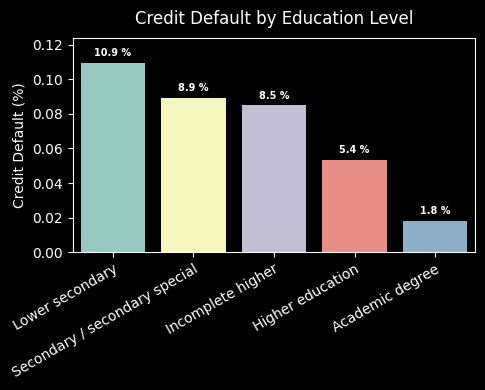

In [26]:
from home_credit.nb_macros import show_target_rate_by_class
show_target_rate_by_class(
    target_rate_by_class, "NAME_EDUCATION_TYPE",
    title="Credit Default by Education Level"
)

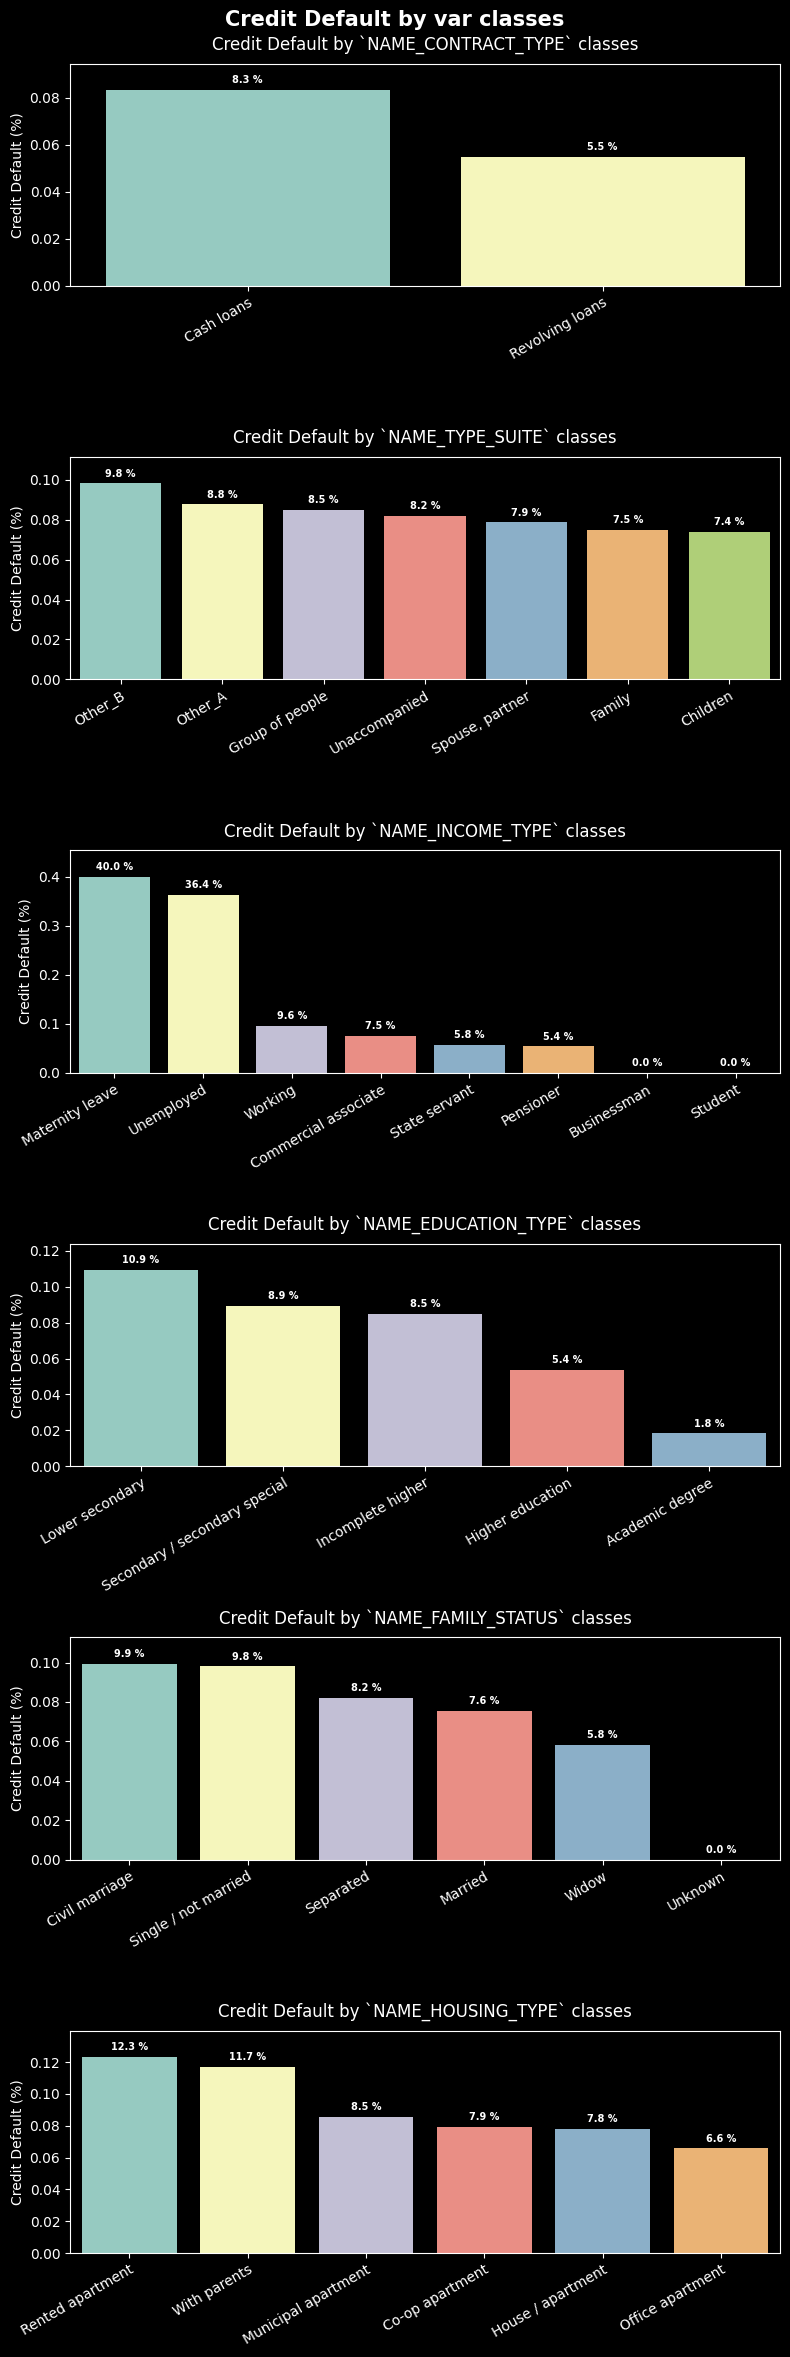

In [27]:
from home_credit.nb_macros import show_datablock_target_rate_by_class
show_datablock_target_rate_by_class(datablock)

### Cas d'une variable continue

In [2]:
from home_credit.nb_macros import get_labeled_datablock
from home_credit.feat_eng import nullify_365243
datablock = get_labeled_datablock("application", "DAYS_.*")
nullify_365243(datablock)
datablock[datablock.columns[1:]] = -datablock[datablock.columns[1:]] / 365.25
display(datablock)

application,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,1,25.903,1.744,9.988,5.804,3.105
1,0,45.900,3.253,3.247,0.797,2.267
2,0,52.145,0.616,11.663,6.930,2.231
3,0,52.033,8.320,26.921,6.672,1.689
4,0,54.571,8.318,11.803,9.467,3.028
...,...,...,...,...,...,...
356250,-1,54.675,14.152,24.898,9.306,1.873
356251,-1,30.626,3.146,8.255,8.222,-0.000
356252,-1,43.592,8.315,7.340,4.118,2.294
356253,-1,38.242,7.477,4.000,3.734,6.319


In [3]:
from home_credit.nb_macros import get_target_rate_by_class
target_rate_by_class = get_target_rate_by_class(datablock, "DAYS_BIRTH")
display(target_rate_by_class)

application,DAYS_BIRTH,TARGET
0,"(20.455, 25.361]",0.122
1,"(25.361, 30.218]",0.111
2,"(30.218, 35.075]",0.102
3,"(35.075, 39.932]",0.089
4,"(39.932, 44.789]",0.079
5,"(44.789, 49.645]",0.074
6,"(49.645, 54.502]",0.068
7,"(54.502, 59.359]",0.056
8,"(59.359, 64.216]",0.053
9,"(64.216, 69.073]",0.042


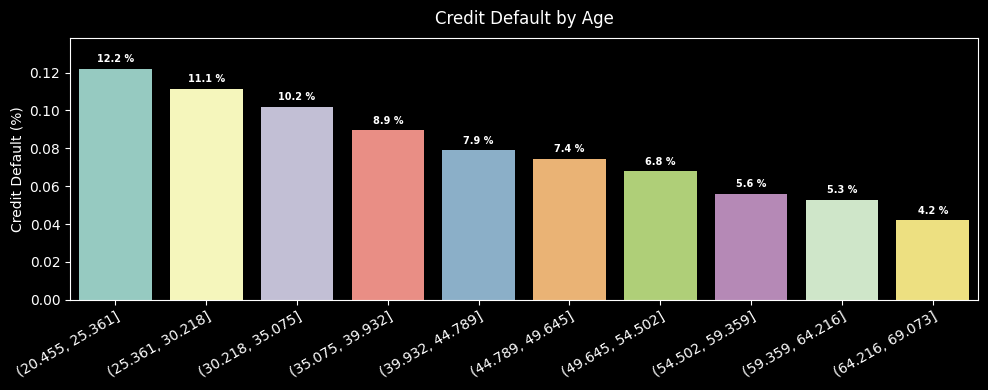

In [4]:
from home_credit.nb_macros import show_target_rate_by_class
show_target_rate_by_class(
    target_rate_by_class, "DAYS_BIRTH",
    title="Credit Default by Age"
)

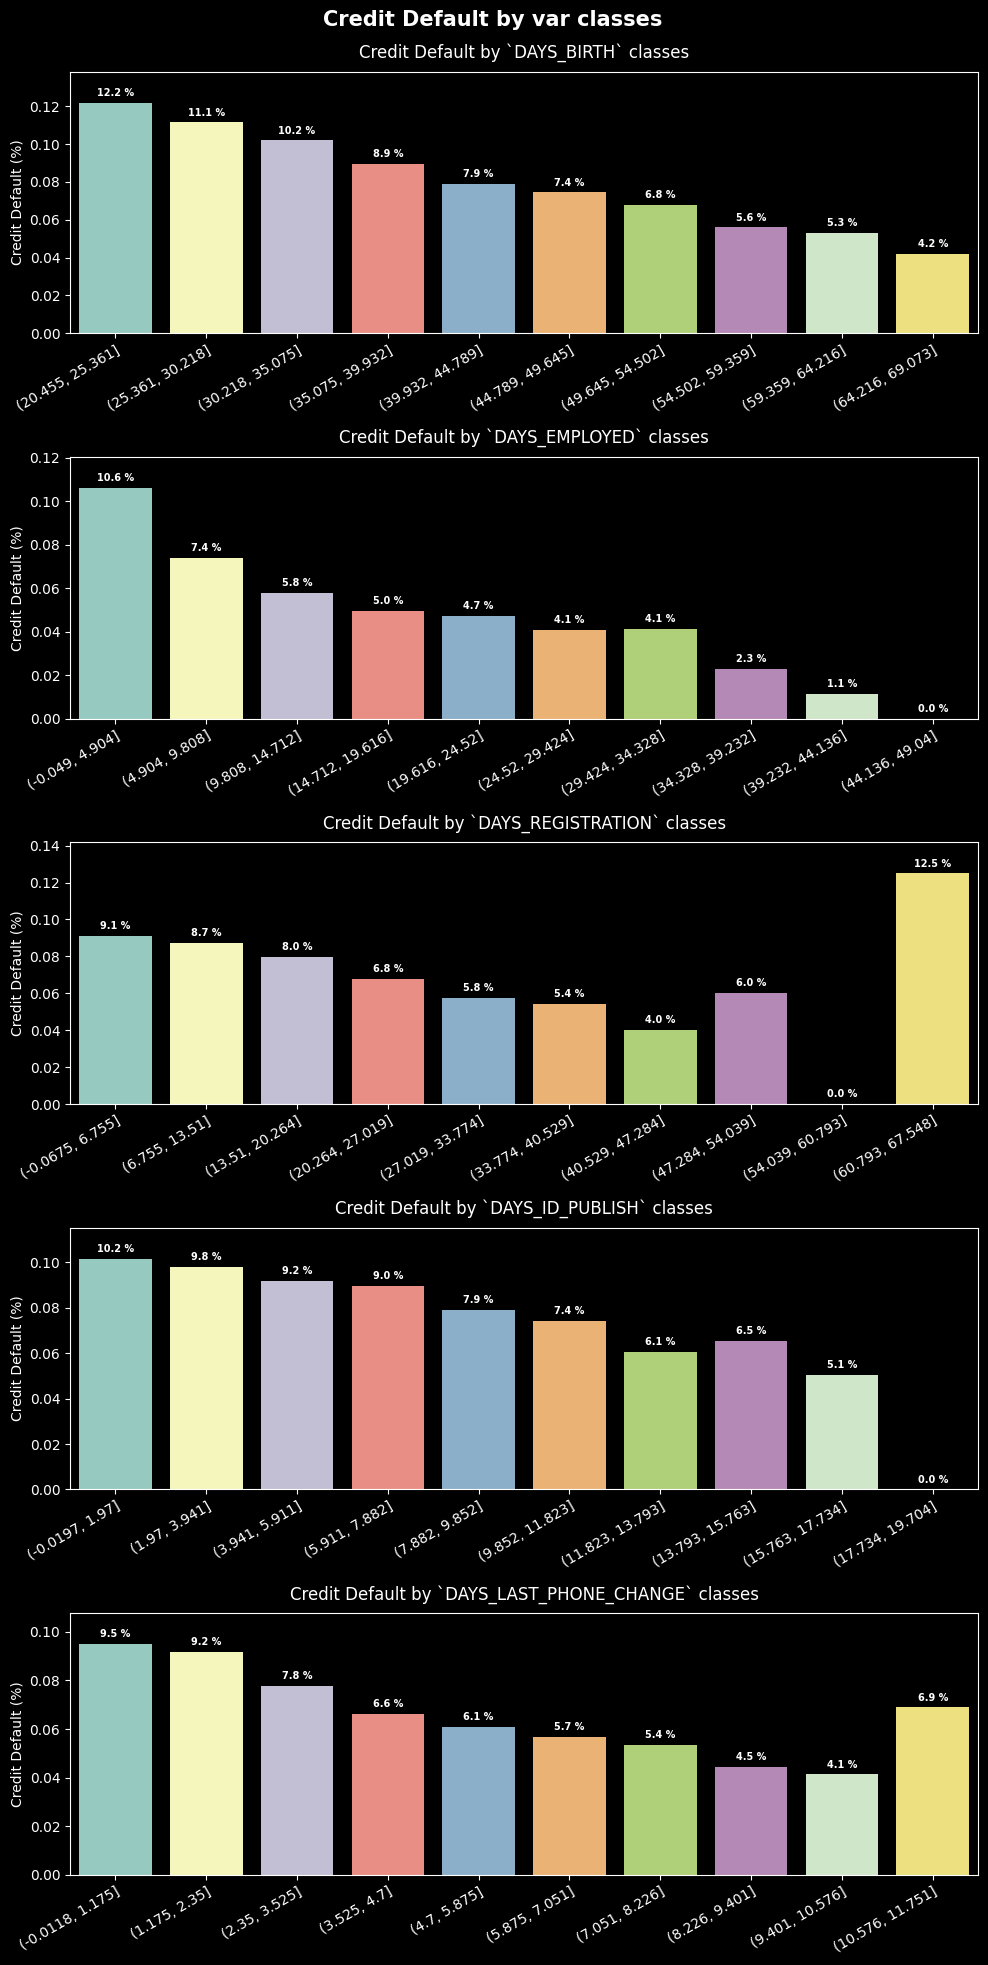

In [5]:
from home_credit.nb_macros import show_datablock_target_rate_by_class
show_datablock_target_rate_by_class(datablock)

## Dédramatiser : plot en paire